# Python機器學習與深度學習入門 
## Question ：擊敗老師的神經網路
## by R07522717 林温雅

`Package`

In [1]:
from keras.datasets import mnist
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


`load進資料`

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

`確認資料`

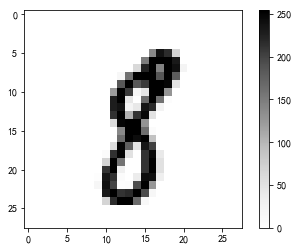

8


In [3]:
X = x_train[300]
plt.imshow(X, cmap = 'Greys')
plt.colorbar()
plt.show()
print(y_train[300])

`資料reshape、正規化、1-hot encoding`

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 比較各種參數對結果的影響
## 比較標的：
### model_1 $\Longleftrightarrow$ model_2 : Hidden Layer數
### model_2 $\Longleftrightarrow$ model_3 : Neuron數
### model_3 $\Longleftrightarrow$ model_4 : 不同Activation Function
### model_4 $\Longleftrightarrow$ model_5 : 不同Loss Function
### model_5 $\Longleftrightarrow$ model_6 : 不同Batch size

## Model_1

In [5]:
%%time
%%capture
model_1 = Sequential()

model_1.add(Dense(10, input_dim=784))
model_1.add(Activation('relu'))

model_1.add(Dense(10))
model_1.add(Activation('relu'))

model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_1.summary()

model_1_history = model_1.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                         validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

CPU times: user 30.3 s, sys: 4.96 s, total: 35.3 s
Wall time: 9.84 s


## Model_2 (除了多加一層hidden layer，其餘參數都與Model_1相同)

In [6]:
%%time
%%capture
model_2 = Sequential()

model_2.add(Dense(10, input_dim=784))
model_2.add(Activation('relu'))

model_2.add(Dense(10))
model_2.add(Activation('relu'))

model_2.add(Dense(10))
model_2.add(Activation('relu'))

model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_2.summary()

model_2_history = model_2.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                         validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

CPU times: user 31.9 s, sys: 5.2 s, total: 37 s
Wall time: 10.5 s


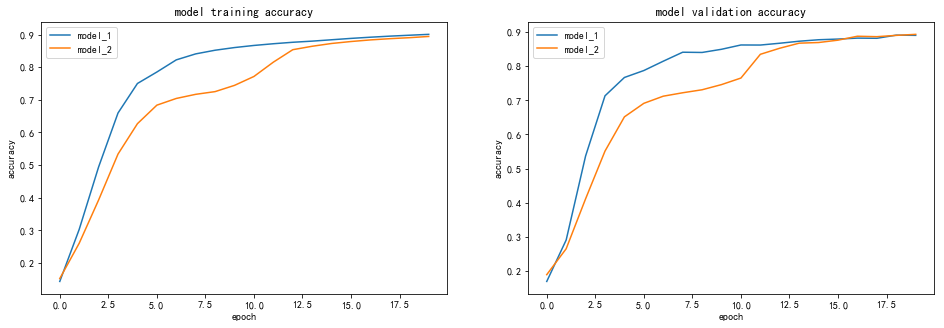

In [7]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["acc"])
plt.plot(model_2_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_acc"])
plt.plot(model_2_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

plt.show()

經過比對，Model_2多加一層故多花了一些計算時間（9.84 vs. 10.5 sec)  
但最後的結果與Model_1差不多
故小結：在這個case中，多加hidden layer意義並不大

## Model_3 (每層的neuron數調整為2倍，其餘參數都與Model_1相同)

In [8]:
%%time
%%capture
model_3 = Sequential()

model_3.add(Dense(20, input_dim=784))
model_3.add(Activation('relu'))

model_3.add(Dense(20))
model_3.add(Activation('relu'))

model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_3.summary()

model_3_history = model_3.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                         validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

CPU times: user 35.7 s, sys: 13 s, total: 48.7 s
Wall time: 11.3 s


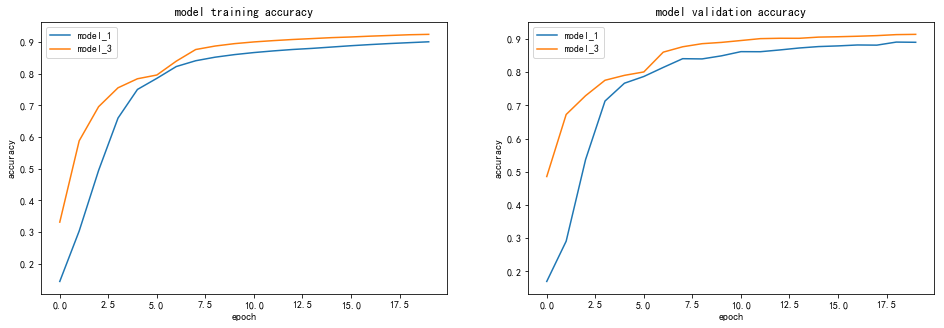

In [9]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["acc"])
plt.plot(model_3_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_acc"])
plt.plot(model_3_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

plt.show()

Model_3的accuracy明顯全域比Model_1高，故提高適量神經元數對結果有明顯改善  
小結：在這個case中，多加neuron有幫助

## Model_4 (套用不同Activation Function，其餘參數都與Model_3相同)

因Model_3已使用relu，故這邊多做sigmoid和tanh的

In [10]:
%%capture
# relu
model_4_relu_history = model_3_history

# sigmoid
model_4_sigmoid = Sequential()
model_4_sigmoid.add(Dense(20, input_dim=784))
model_4_sigmoid.add(Activation('sigmoid'))
model_4_sigmoid.add(Dense(20))
model_4_sigmoid.add(Activation('sigmoid'))
model_4_sigmoid.add(Dense(10))
model_4_sigmoid.add(Activation('softmax'))
model_4_sigmoid.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_sigmoid.summary()
model_4_sigmoid_history = model_4_sigmoid.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                         validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# tanh
model_4_tanh = Sequential()
model_4_tanh.add(Dense(20, input_dim=784))
model_4_tanh.add(Activation('tanh'))
model_4_tanh.add(Dense(20))
model_4_tanh.add(Activation('tanh'))
model_4_tanh.add(Dense(10))
model_4_tanh.add(Activation('softmax'))
model_4_tanh.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_tanh.summary()
model_4_tanh_history = model_4_tanh.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                         validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

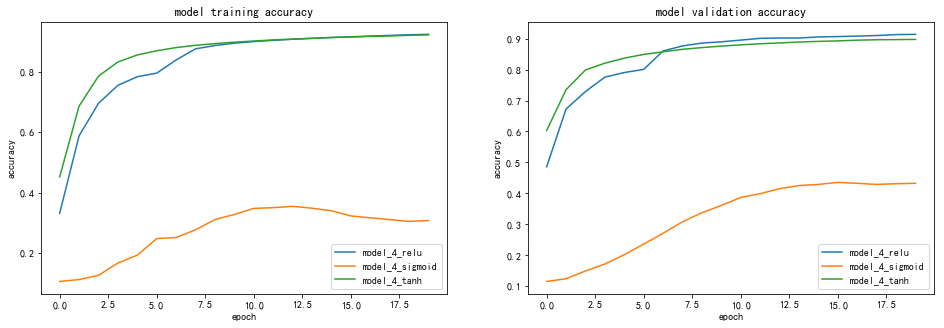

In [11]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_4_relu_history.history["acc"])
plt.plot(model_4_sigmoid_history.history["acc"])
plt.plot(model_4_tanh_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_4_relu_history.history["val_acc"])
plt.plot(model_4_sigmoid_history.history["val_acc"])
plt.plot(model_4_tanh_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

plt.show()

三個Activation Function中，在現行參數配置下relu看起來是效果最好的(validation accuracy越看漲越好)  
小結：選取relu作為Activation Function

## Model_5 (套用不同Loss Function，其餘參數都與Model_4_relu相同)

In [12]:
%%capture

# mean_squared_error
model_5_mse_history = model_4_relu_history

# mean_absolute_error
model_5_mae = Sequential()
model_5_mae.add(Dense(20, input_dim=784))
model_5_mae.add(Activation('relu'))
model_5_mae.add(Dense(20))
model_5_mae.add(Activation('relu'))
model_5_mae.add(Dense(10))
model_5_mae.add(Activation('softmax'))
model_5_mae.compile(loss='mae', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mae.summary()
model_5_mae_history = model_5_mae.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# mean_absolute_percentage_error
model_5_mape = Sequential()
model_5_mape.add(Dense(20, input_dim=784))
model_5_mape.add(Activation('relu'))
model_5_mape.add(Dense(20))
model_5_mape.add(Activation('relu'))
model_5_mape.add(Dense(10))
model_5_mape.add(Activation('softmax'))
model_5_mape.compile(loss='mape', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mape.summary()
model_5_mape_history = model_5_mape.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# mean_squared_logarithmic_error
model_5_msle = Sequential()
model_5_msle.add(Dense(20, input_dim=784))
model_5_msle.add(Activation('relu'))
model_5_msle.add(Dense(20))
model_5_msle.add(Activation('relu'))
model_5_msle.add(Dense(10))
model_5_msle.add(Activation('softmax'))
model_5_msle.compile(loss='msle', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_msle.summary()
model_5_msle_history = model_5_msle.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

In [13]:
%%capture
# hinge
model_5_hinge = Sequential()
model_5_hinge.add(Dense(20, input_dim=784))
model_5_hinge.add(Activation('relu'))
model_5_hinge.add(Dense(20))
model_5_hinge.add(Activation('relu'))
model_5_hinge.add(Dense(10))
model_5_hinge.add(Activation('softmax'))
model_5_hinge.compile(loss='hinge', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_hinge.summary()
model_5_hinge_history = model_5_hinge.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# kullback_leibler_divergence
model_5_kld = Sequential()
model_5_kld.add(Dense(20, input_dim=784))
model_5_kld.add(Activation('relu'))
model_5_kld.add(Dense(20))
model_5_kld.add(Activation('relu'))
model_5_kld.add(Dense(10))
model_5_kld.add(Activation('softmax'))
model_5_kld.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_kld.summary()
model_5_kld_history = model_5_kld.fit(x_train_norm, y_train, batch_size=500, epochs=20,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

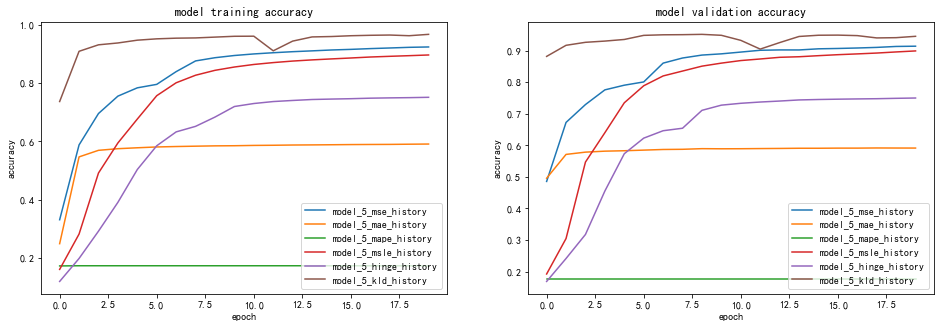

In [14]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_5_mse_history.history["acc"])
plt.plot(model_5_mae_history.history["acc"])
plt.plot(model_5_mape_history.history["acc"])
plt.plot(model_5_msle_history.history["acc"])
plt.plot(model_5_hinge_history.history["acc"])
plt.plot(model_5_kld_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_5_mse_history.history["val_acc"])
plt.plot(model_5_mae_history.history["val_acc"])
plt.plot(model_5_mape_history.history["val_acc"])
plt.plot(model_5_msle_history.history["val_acc"])
plt.plot(model_5_hinge_history.history["val_acc"])
plt.plot(model_5_kld_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history"], loc = "best")

plt.show()

在現行參數下，測試的6個Loss Function中，kullback_leibler_divergence是效果最好的，在一開始就有很高的正確率  
小結：選取kullback_leibler_divergence是效果最好的作為Loss Function

## Model_6 (使用不同的batch_size，其餘參數都與model_5_kld相同)

In [15]:
%%capture

# 把原本model_5_kld一起拿來畫
# epochs=20, batch_size=500
model_6_20_500_history = model_5_kld_history

# epochs=40, batch_size=250
model_6_40_250 = Sequential()
model_6_40_250.add(Dense(20, input_dim=784))
model_6_40_250.add(Activation('relu'))
model_6_40_250.add(Dense(20))
model_6_40_250.add(Activation('relu'))
model_6_40_250.add(Dense(10))
model_6_40_250.add(Activation('softmax'))
model_6_40_250.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_6_40_250.summary()
model_6_40_250_history = model_6_40_250.fit(x_train_norm, y_train, batch_size=250, epochs=40,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# epochs=40, batch_size=500
model_6_40_500 = Sequential()
model_6_40_500.add(Dense(20, input_dim=784))
model_6_40_500.add(Activation('relu'))
model_6_40_500.add(Dense(20))
model_6_40_500.add(Activation('relu'))
model_6_40_500.add(Dense(10))
model_6_40_500.add(Activation('softmax'))
model_6_40_500.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_6_40_500.summary()
model_6_40_500_history = model_6_40_500.fit(x_train_norm, y_train, batch_size=500, epochs=40,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

# epochs=40, batch_size=1000
model_6_40_1000 = Sequential()
model_6_40_1000.add(Dense(20, input_dim=784))
model_6_40_1000.add(Activation('relu'))
model_6_40_1000.add(Dense(20))
model_6_40_1000.add(Activation('relu'))
model_6_40_1000.add(Dense(10))
model_6_40_1000.add(Activation('softmax'))
model_6_40_1000.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_6_40_1000.summary()
model_6_40_1000_history = model_6_40_1000.fit(x_train_norm, y_train, batch_size=1000, epochs=40,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

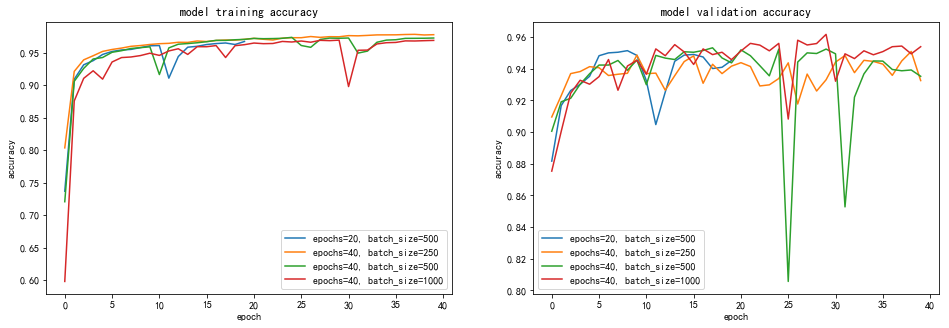

In [16]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_6_20_500_history.history["acc"])
plt.plot(model_6_40_250_history.history["acc"])
plt.plot(model_6_40_500_history.history["acc"])
plt.plot(model_6_40_1000_history.history["acc"])


plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["epochs=20, batch_size=500", "epochs=40, batch_size=250", "epochs=40, batch_size=500", "epochs=40, batch_size=1000"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_6_20_500_history.history["val_acc"])
plt.plot(model_6_40_250_history.history["val_acc"])
plt.plot(model_6_40_500_history.history["val_acc"])
plt.plot(model_6_40_1000_history.history["val_acc"])


plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["epochs=20, batch_size=500", "epochs=40, batch_size=250", "epochs=40, batch_size=500", "epochs=40, batch_size=1000"], loc = "best")
plt.show()

epochs提高時accuracy逐漸提高是可預見的，但過度訓練會overfitting，所以在accuracy相近時比對validation_accuracy來挑選結果  
根據實驗結果（在測試的scale內）  
小結：batch_size的選擇變化多樣，在這個case中沒有一個明顯比較好的選擇

## 測試小結
* 兩層hidden layer
* 提高neuron數
* 選取relu作為Activation Function
* 選取kullback_leibler_divergence作為Loss Function
* batch_size=250, epochs=150來觀察變化

## Model_Final

In [17]:
%%capture
model_final = Sequential()
model_final.add(Dense(50, input_dim=784))
model_final.add(Activation('relu'))
model_final.add(Dense(50))
model_final.add(Activation('relu'))
model_final.add(Dense(10))
model_final.add(Activation('softmax'))
model_final.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_final.summary()
model_final_history = model_final.fit(x_train_norm, y_train, batch_size=250, epochs=150,
                        validation_data = (x_test, y_test),
                         verbose = 2, shuffle = True)

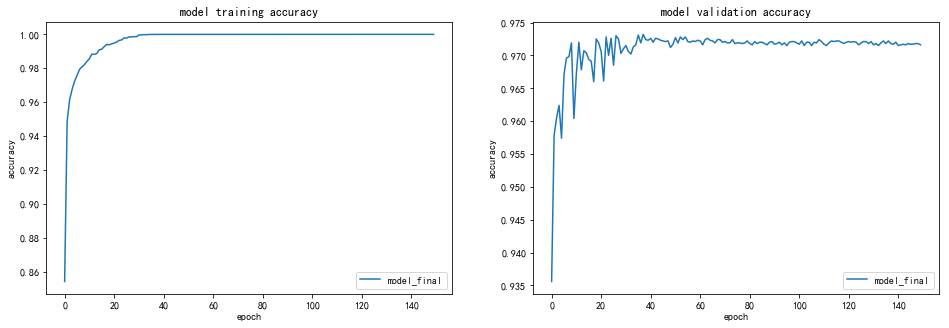

In [18]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_final_history.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_final_history.history["val_acc"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_final"], loc = "best")

plt.show()

In [19]:
max_acc = max(model_final_history.history["acc"])
max_index = model_final_history.history["acc"].index(max_acc)
max_valacc = max(model_final_history.history["val_acc"])
max_valindex = model_final_history.history["val_acc"].index(max_valacc)
print(f'最高training accuracy： {max_acc}\n發生在epoch = {max_index}')
print(f'最高validation accuracy： {max_valacc}\n發生在epoch = {max_valindex}')

最高training accuracy： 0.9999833332995574
發生在epoch = 46
最高validation accuracy： 0.9731999963521958
發生在epoch = 37


可看出training accuracy在epoch=46以後早接近100%，但隨著epoch增加，validation accuracy卻震盪且些微下降，因已overfitting  
驗證先前的估測，並不是epochs越高就越好

### 總結：一個model可以調的參數實在是太多，故勢必得了解每個參數背後的意義，才不會流於整天調整參數試結果